In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from autoviz.AutoViz_Class import AutoViz_Class
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from imblearn import FunctionSampler  # to use a idendity sampler
from imblearn.over_sampling import ADASYN, SMOTE
from tabulate import tabulate

from utils.dataset import load_dataset, split_data
from models.model_selection import ModelSelector
from evaluation.metrics import calculate_metrics

%matplotlib inline

Imported v0.1.904. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [2]:
# Load dataset and describe it

dataset_path = 'dataset/hcvdat0.csv'


hcv_df = load_dataset(dataset_path)
hcv_df = hcv_df[hcv_df.columns[1:]]  # remove first 'Unnamed' column
hcv_df.head(5)

print(f'Number of different categories: {hcv_df["Category"].value_counts()}')
# describe DataFrame
hcv_df.describe()

# Identify non-numeric columns and their unique values
for column in ['Category', 'Sex']:
    unique_values = hcv_df[column].unique()
    print(f'Unique values in column {column}:')
    print(unique_values)
    print('\n')

Number of different categories: Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64
Unique values in column Category:
['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']


Unique values in column Sex:
['m' 'f']




In [3]:
# Transforming string values to numeric (Category, Sex) and filling nulls
category_mapping = {
    '0=Blood Donor': 0,
    '1=Hepatitis': 1,
    '2=Fibrosis': 2,
    '3=Cirrhosis': 3,
    '0s=suspect Blood Donor': 4
}

sex_mapping = {
    'm': 0,
    'f': 1
}

replacement_dict = {
    'Category': category_mapping,
    'Sex': sex_mapping
}

hcv_df.replace(replacement_dict, inplace=True)
hcv_df = hcv_df.fillna(method='ffill')
hcv_df.head(5)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


Shape of your Data Set loaded: (615, 13)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    13 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Category,int64,0.000000,0,0.000000,4.000000,Column has 82 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.
Age,int64,0.000000,7,19.000000,77.000000,Column has 1 outliers greater than upper bound (76.50) or lower than lower bound(16.50). Cap them or remove them.
Sex,int64,0.000000,0,0.000000,1.000000,No issue
ALB,float64,0.000000,NA,14.900000,82.200000,Column has 27 outliers greater than upper bound (54.80) or lower than lower bound(29.20). Cap them or remove them.
ALP,float64,0.000000,NA,11.300000,416.600000,Column has 10 outliers greater than upper bound (122.02) or lower than lower bound(10.23). Cap them or remove them.
ALT,float64,0.000000,NA,0.900000,325.300000,Column has 37 outliers greater than upper bound (58.15) or lower than lower bound(-8.65). Cap them or remove them.
AST,float64,0.000000,NA,10.600000,324.000000,Column has 64 outliers greater than upper bound (49.85) or lower than lower bound(4.65). Cap them or remove them.
BIL,float64,0.000000,NA,0.800000,254.000000,Column has 47 outliers greater than upper bound (20.05) or lower than lower bound(-3.55). Cap them or remove them.
CHE,float64,0.000000,NA,1.420000,16.410000,Column has 24 outliers greater than upper bound (13.57) or lower than lower bound(2.95). Cap them or remove them.
CHOL,float64,0.000000,NA,1.430000,9.670000,Column has 12 outliers greater than upper bound (8.24) or lower than lower bound(2.42). Cap them or remove them.


Number of All Scatter Plots = 55


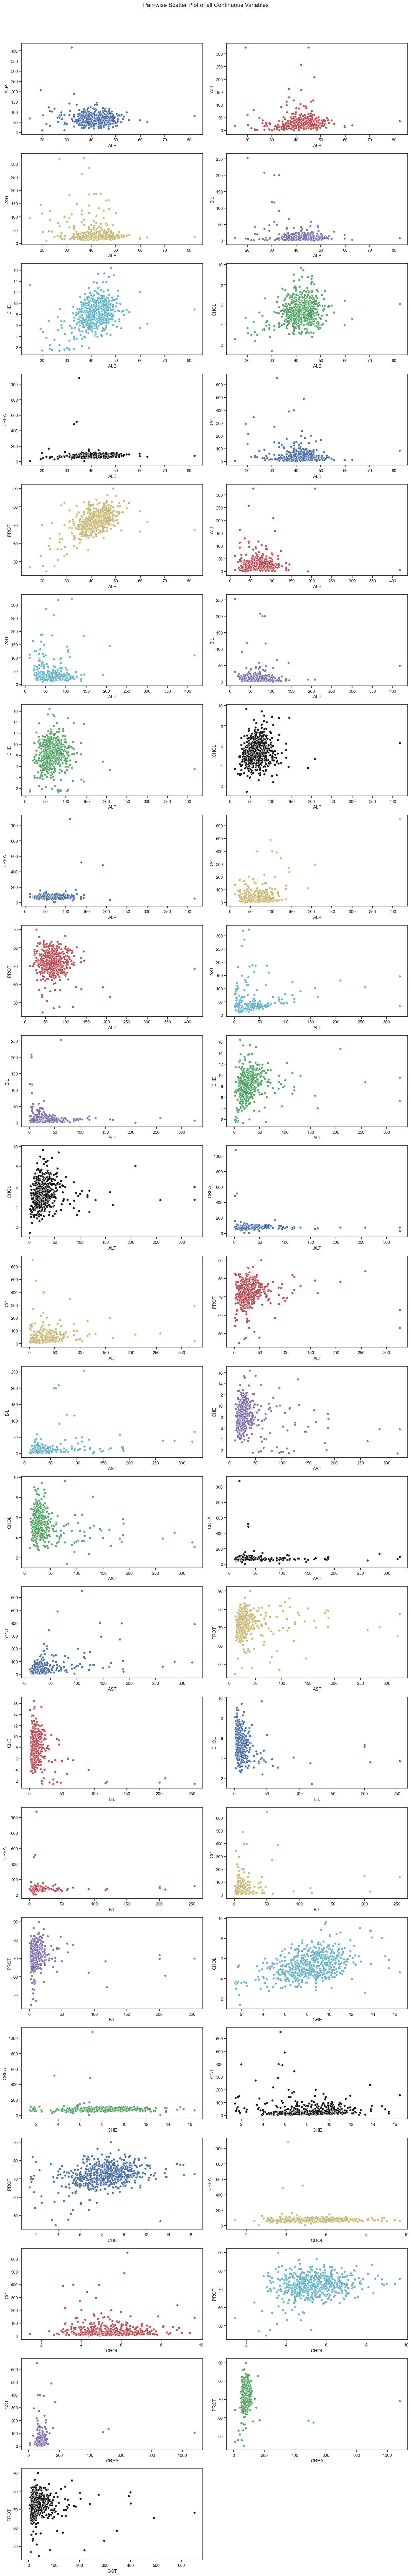

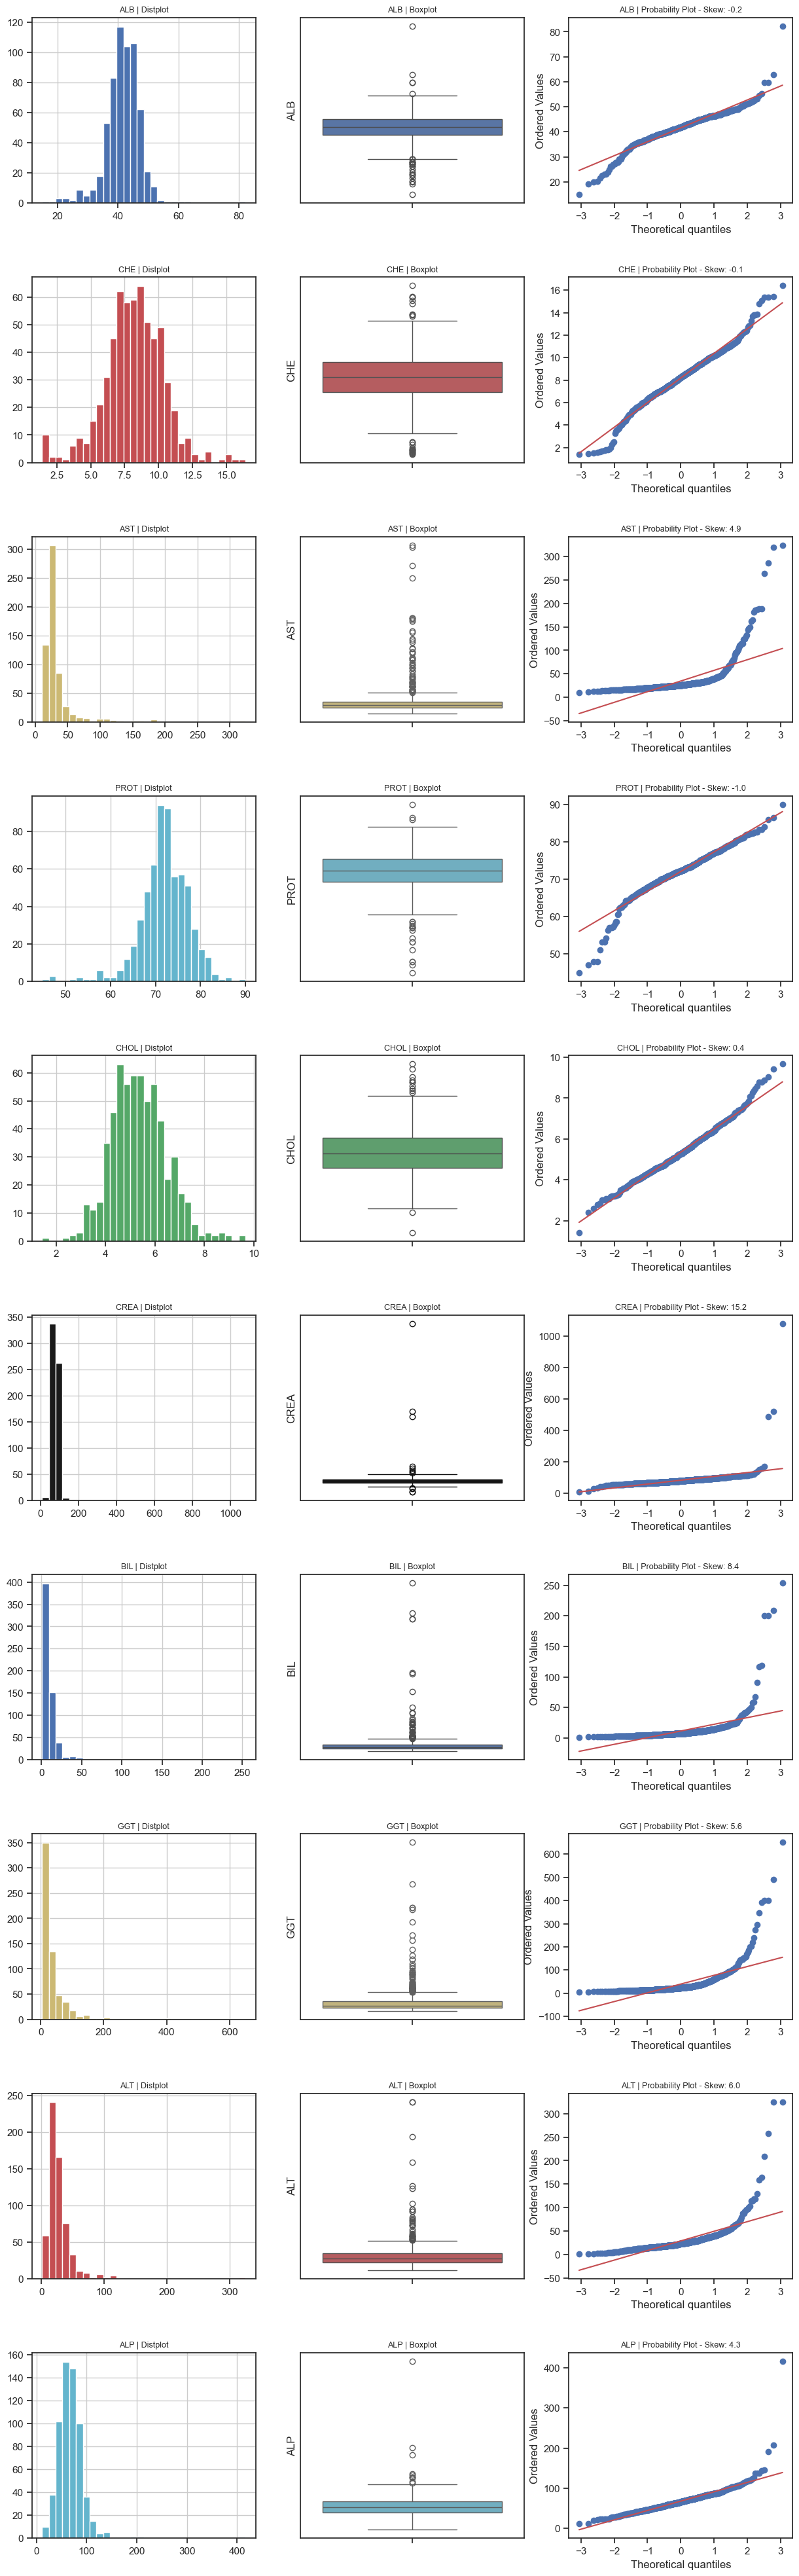

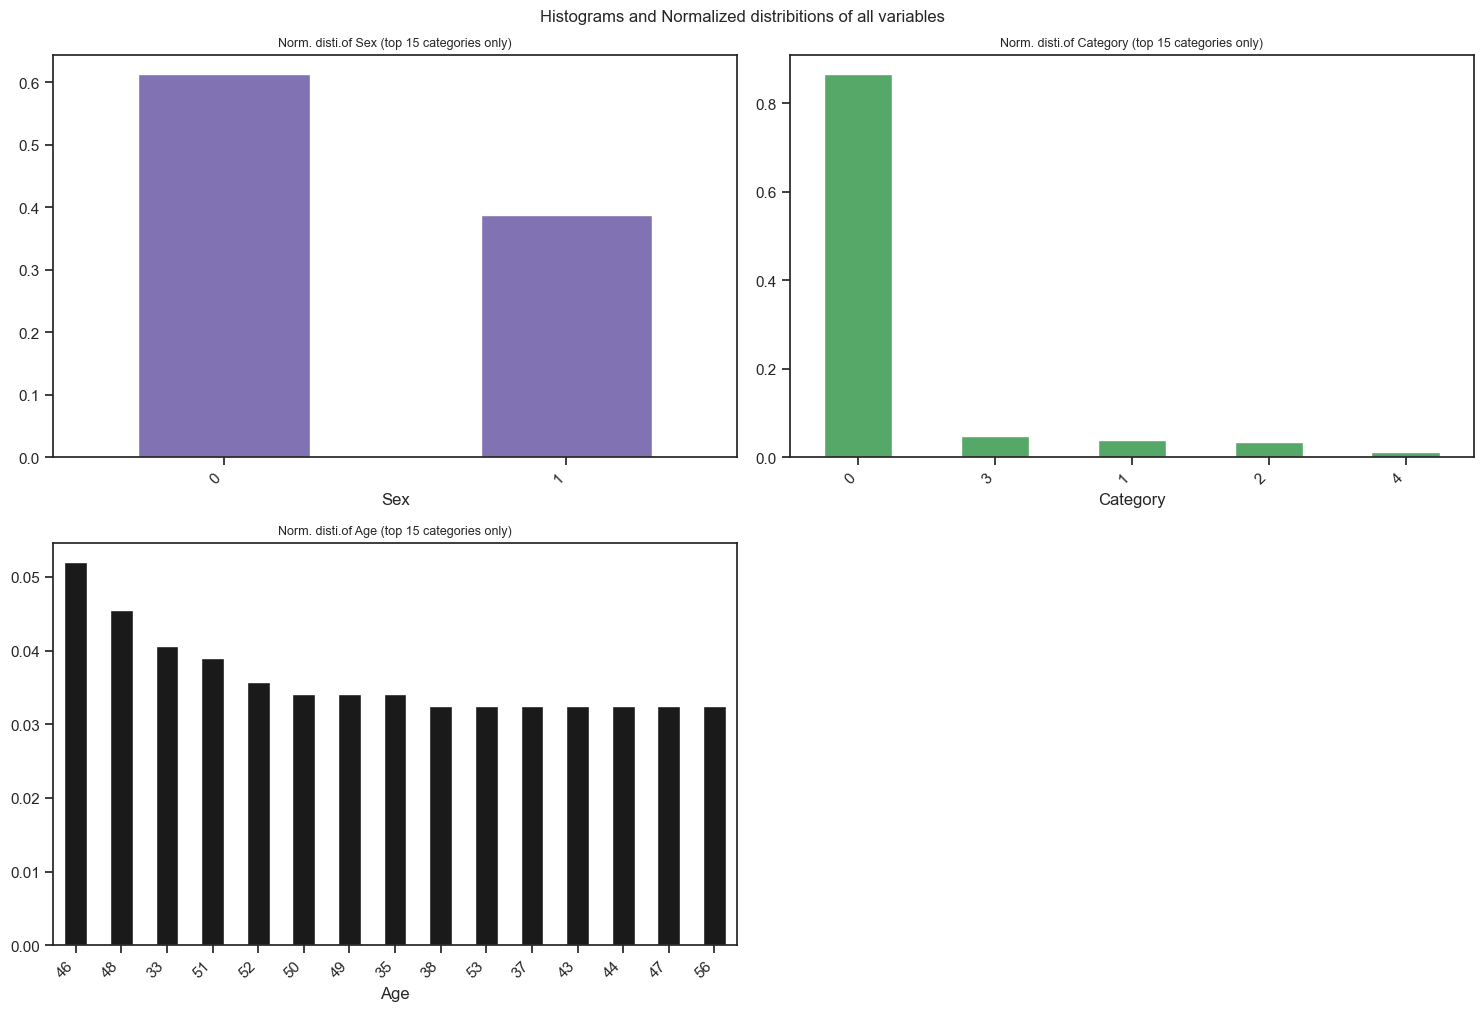

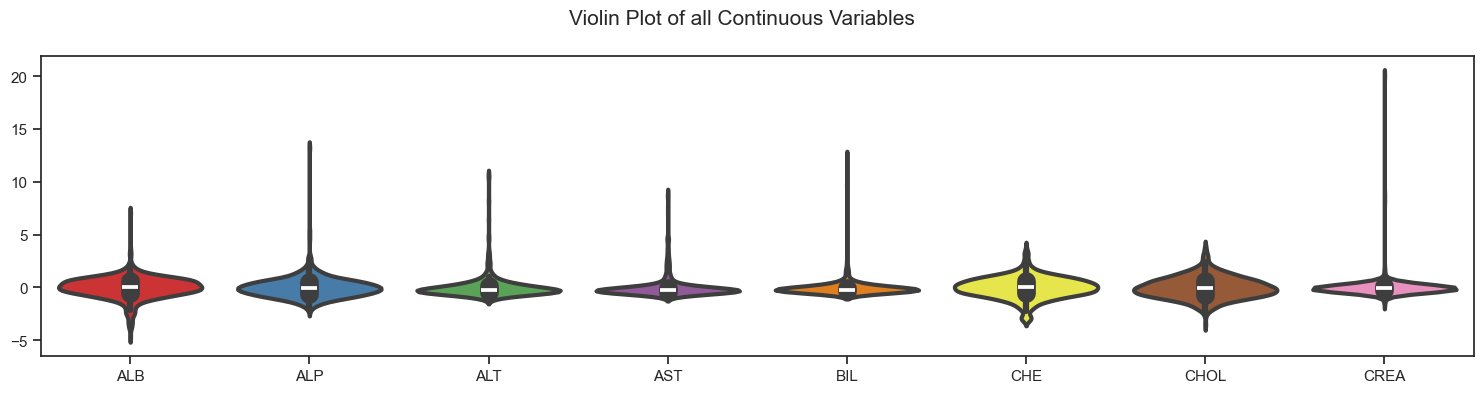

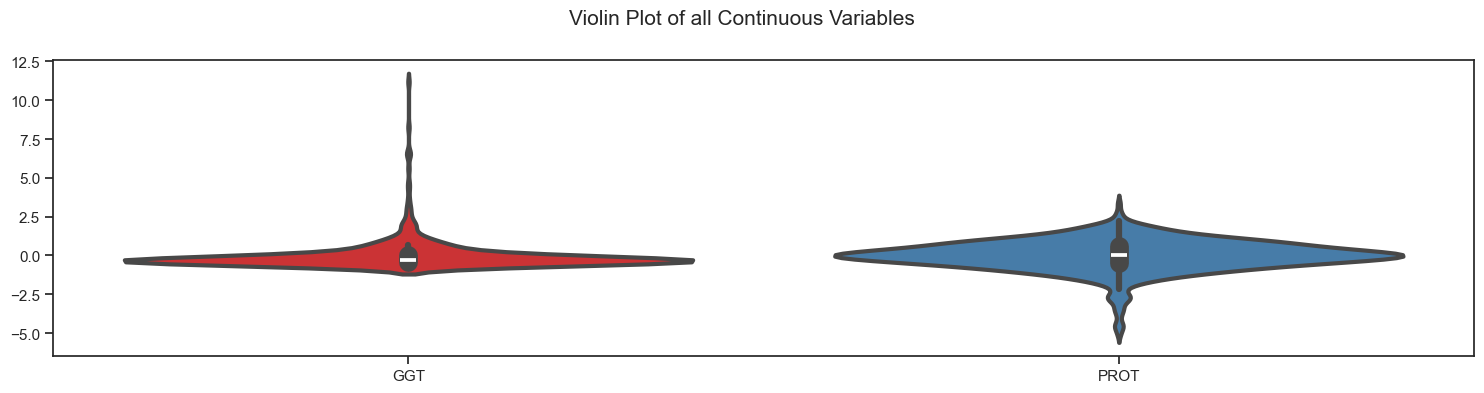

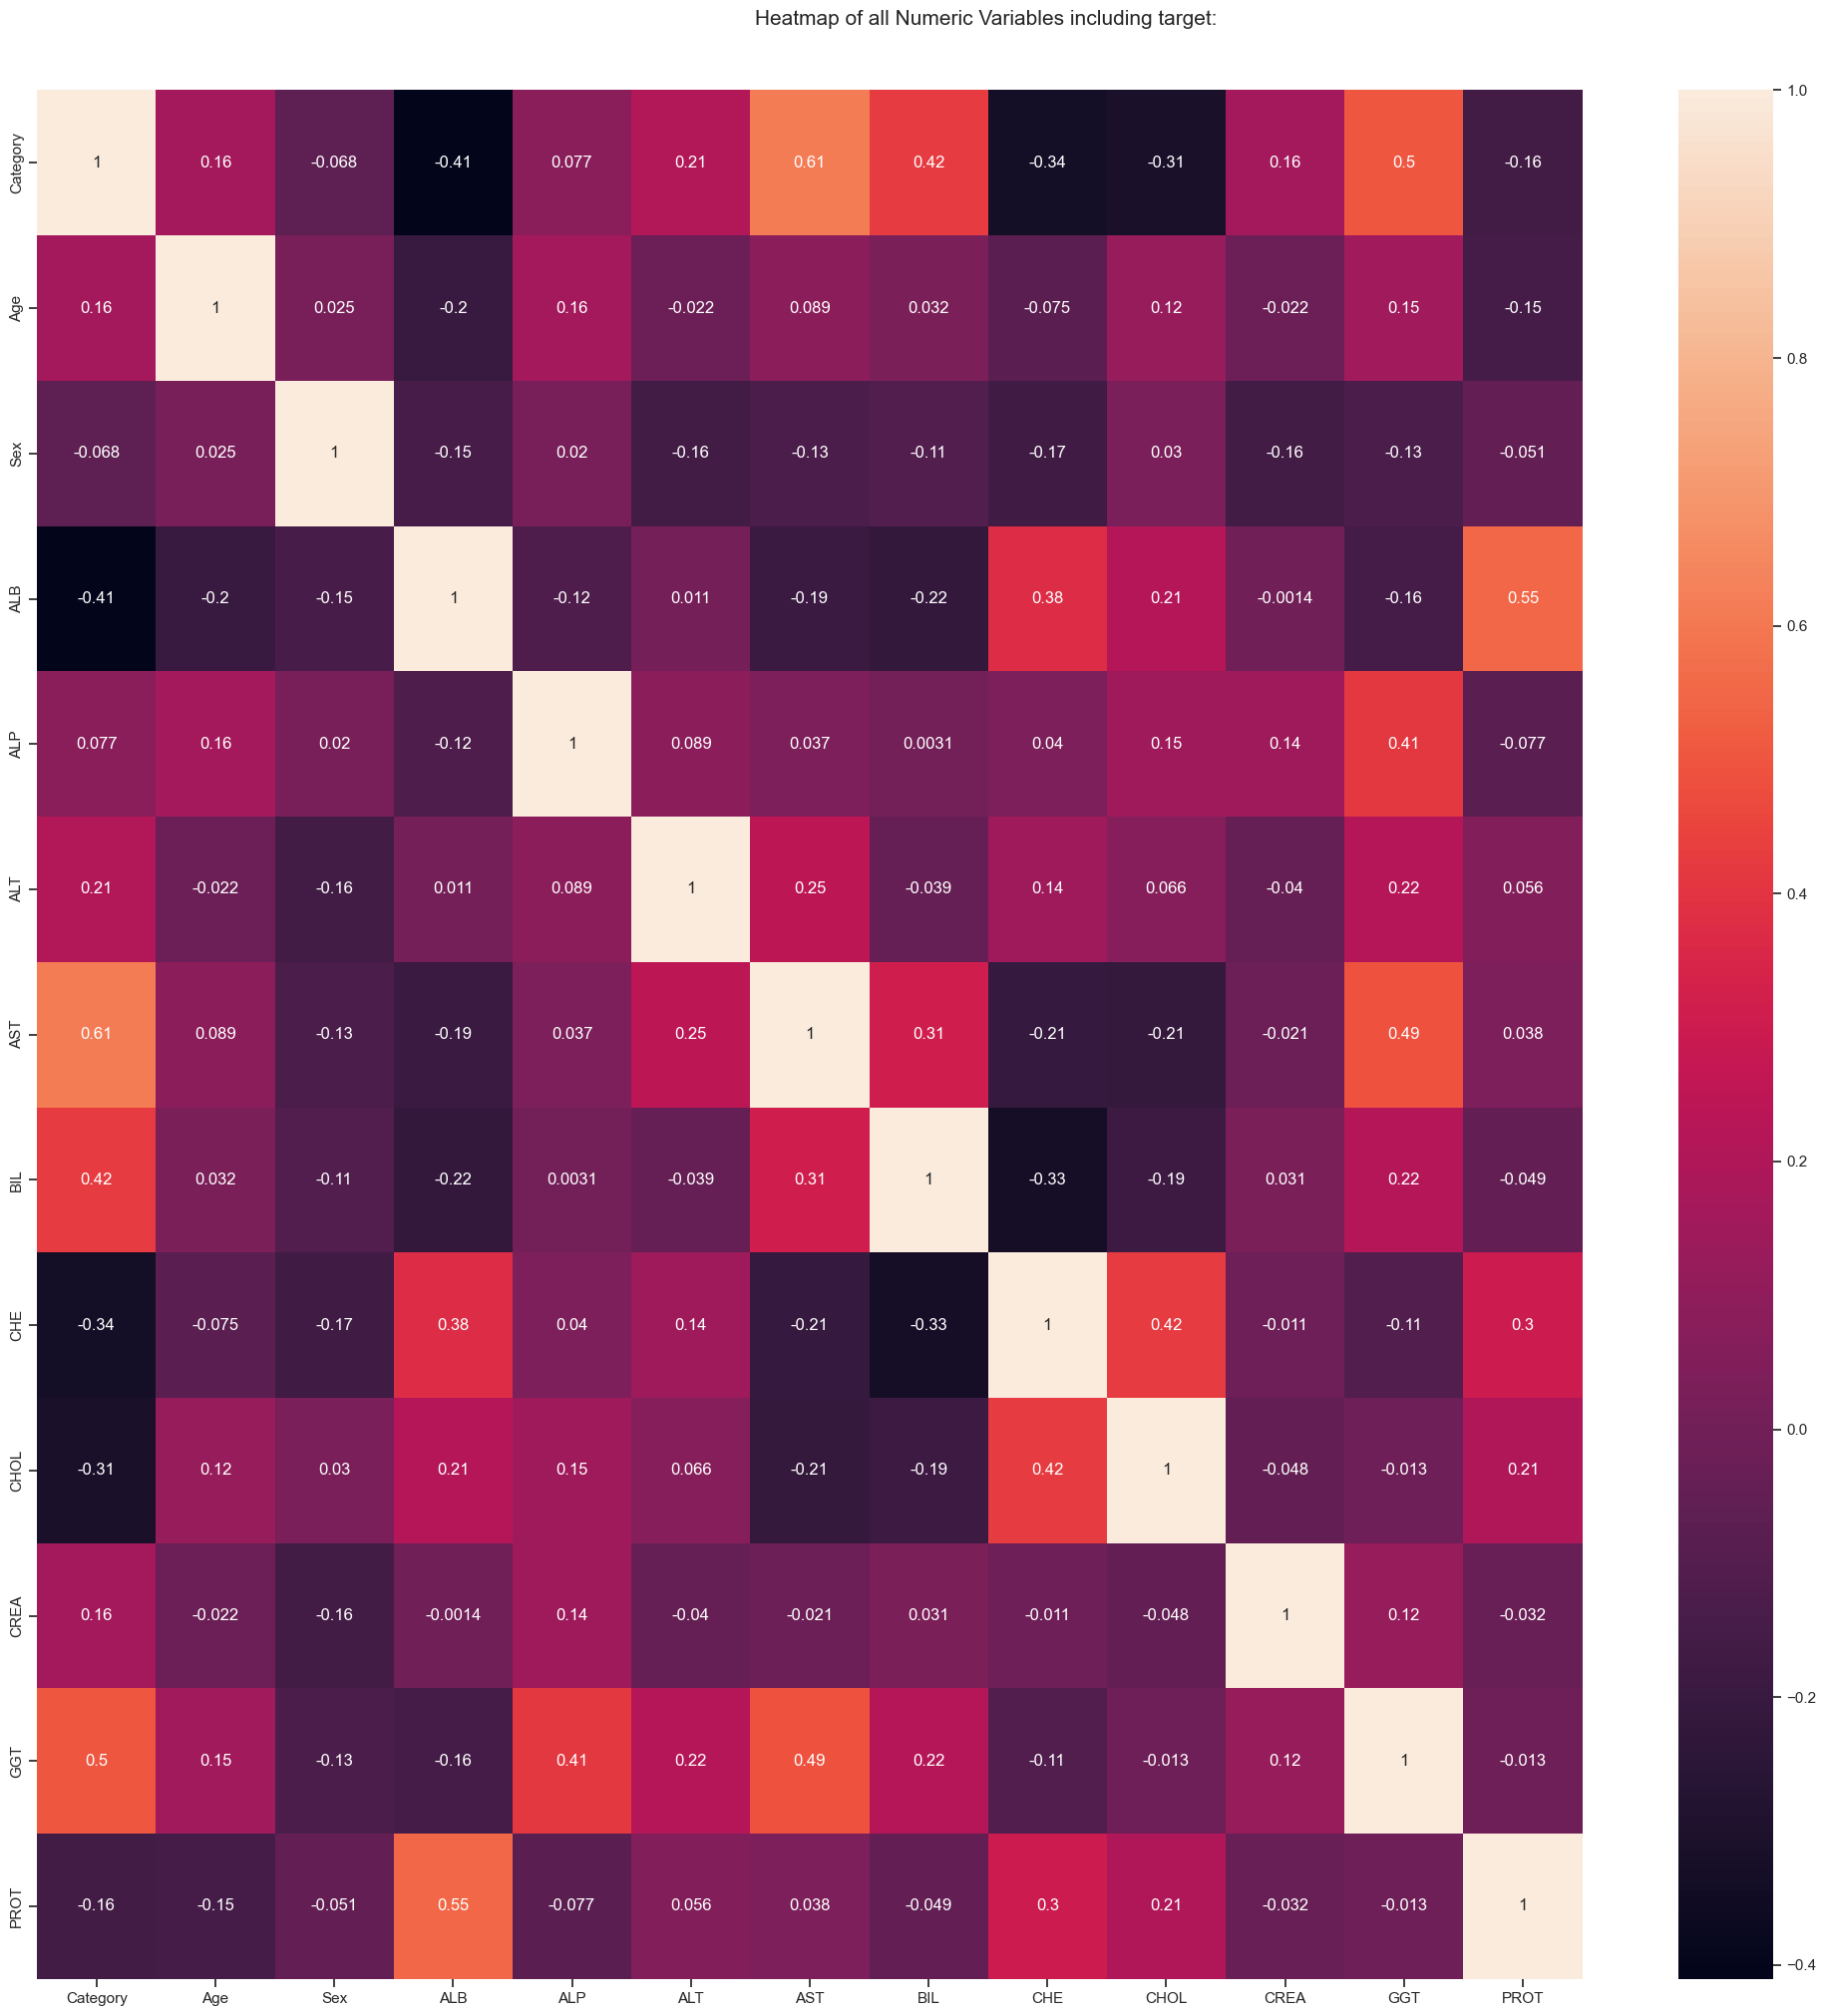

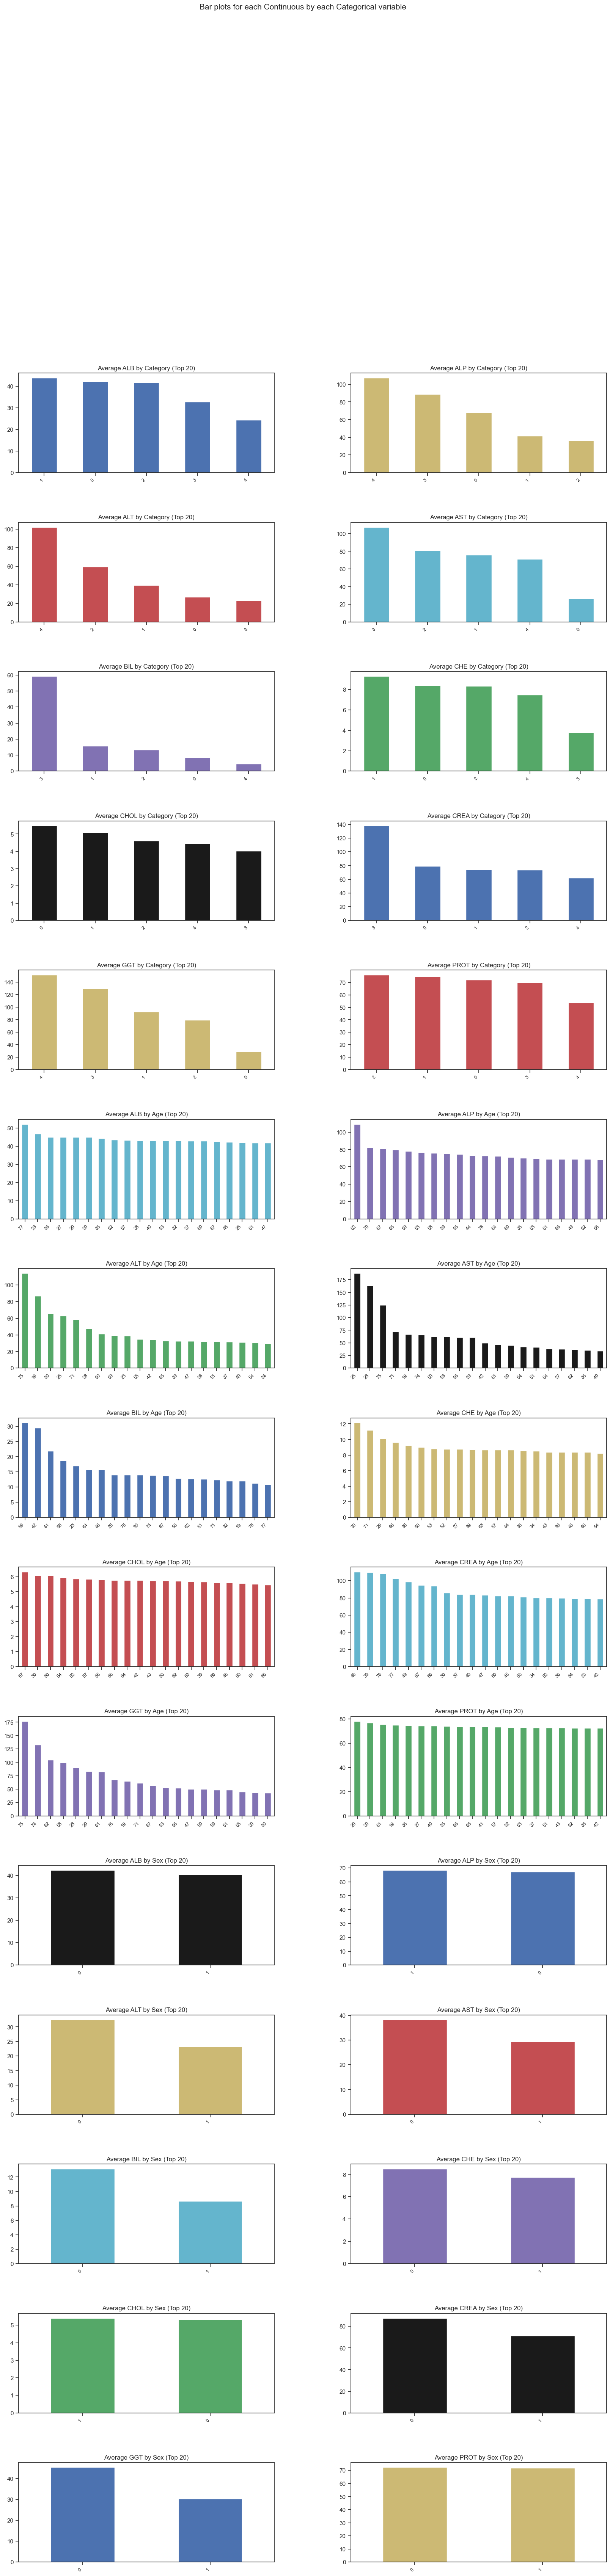

All Plots done
Time to run AutoViz = 16 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3,46,1,33.0,87.3,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [4]:
# creating an AutoViz instance
AV = AutoViz_Class()

# generating data visualization automatically
AV.AutoViz(
    filename='',
    sep=',',
    depVar='',
    dfte=hcv_df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format='svg',
    max_rows_analyzed=10000,
    max_cols_analyzed=30
)

<Axes: >

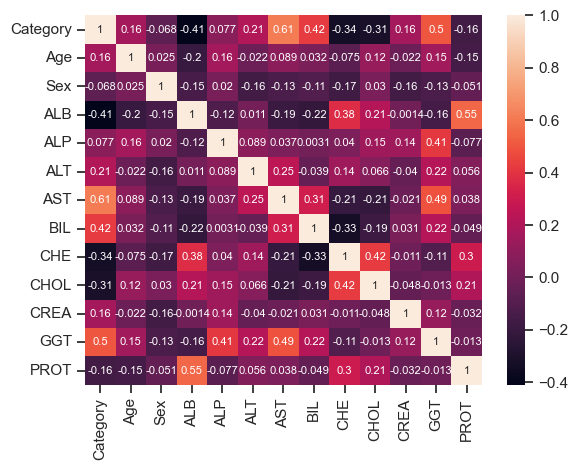

In [5]:
# Plot correlation between columns (features)

sns.heatmap(hcv_df.corr(), annot = True, annot_kws={'fontsize': 8})

In [6]:
# Split train and test data
y_label = 'Category'
X_train, X_test, y_train, y_test = split_data(hcv_df, y_label)

In [7]:
# Oversampling process
adasyn = SMOTE(random_state=42, k_neighbors=3)
X_train, y_train = adasyn.fit_resample(X_train, y_train)

In [8]:
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (1995, 13)
X_test dimension=  (156, 13)
y_train dimension=  (1995,)
y_train dimension=  (156,)


In [9]:
# Example for hyperparams
hyperparams_v1: dict = {
        'logistic': {'max_iter': 50, 'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.005},
        'n_bayes': {'alpha': 1.0},
        'rand_forest': {'n_estimators': 100, 'max_depth': 10, 'criterion': 'log_loss'}
    }


In [10]:
# 1. Plot bias-variance tradeoff for each mode for LOGISTIC MODEL
logistic_hyperparams = [
    {'max_iter': 100, 'solver': 'lbfgs', 'C': 0.000000005},
    {'max_iter': 100, 'solver': 'lbfgs', 'C': 0.00005},
    {'max_iter': 100, 'solver': 'lbfgs', 'C': 0.0005},
    {'max_iter': 100, 'solver': 'lbfgs', 'C': 0.005},
    {'max_iter': 100, 'solver': 'lbfgs', 'C': 0.05},
    {'max_iter': 100, 'solver': 'lbfgs', 'C': 0.5},
    {'max_iter': 100, 'solver': 'lbfgs', 'C': 500},
]

train_errors = []
test_errors = []

for idx, item in enumerate(logistic_hyperparams):
    selector = ModelSelector(
        hyperparams={
            'logistic': logistic_hyperparams[idx]
        }
    )
    
    model = selector.select_model('logistic')
    
    model.fit(X_train, y_train)
    
    # Predict probabilities
    y_train_prob = model.predict_proba(X_train)
    y_test_prob = model.predict_proba(X_test)
    
    # Calculate log loss (negative log likelihood)
    train_errors.append(log_loss(y_train, y_train_prob))
    test_errors.append(log_loss(y_test, y_test_prob))
    
    print('Train log loss: ', log_loss(y_train, y_train_prob, eps=1e-15))
    print('Test log loss: ', log_loss(y_test, y_test_prob, eps=1e-15))
    
    print(f'Training score:', model.score(X_train, y_train), 'for C=', item['C'])
    print('Test score:', model.score(X_test, y_test), 'for C=', item['C'])


Train log loss:  1.594850675695398
Test log loss:  1.5935269518519226
Training score: 0.5473684210526316 for C= 5e-09
Test score: 0.8525641025641025 for C= 5e-09
Train log loss:  0.37721792581658653
Test log loss:  0.8856211722970995
Training score: 0.9037593984962407 for C= 5e-05
Test score: 0.8910256410256411 for C= 5e-05
Train log loss:  0.20552303444567327
Test log loss:  0.9510482272355067
Training score: 0.9388471177944863 for C= 0.0005
Test score: 0.8974358974358975 for C= 0.0005
Train log loss:  0.12587571998357677
Test log loss:  1.1881746929874917
Training score: 0.956390977443609 for C= 0.005
Test score: 0.8974358974358975 for C= 0.005
Train log loss:  0.1007275813454176
Test log loss:  1.3378320178807686
Training score: 0.9639097744360903 for C= 0.05
Test score: 0.8910256410256411 for C= 0.05
Train log loss:  0.09216591609738342
Test log loss:  1.5308054469141883
Training score: 0.968421052631579 for C= 0.5
Test score: 0.8974358974358975 for C= 0.5
Train log loss:  0.088977

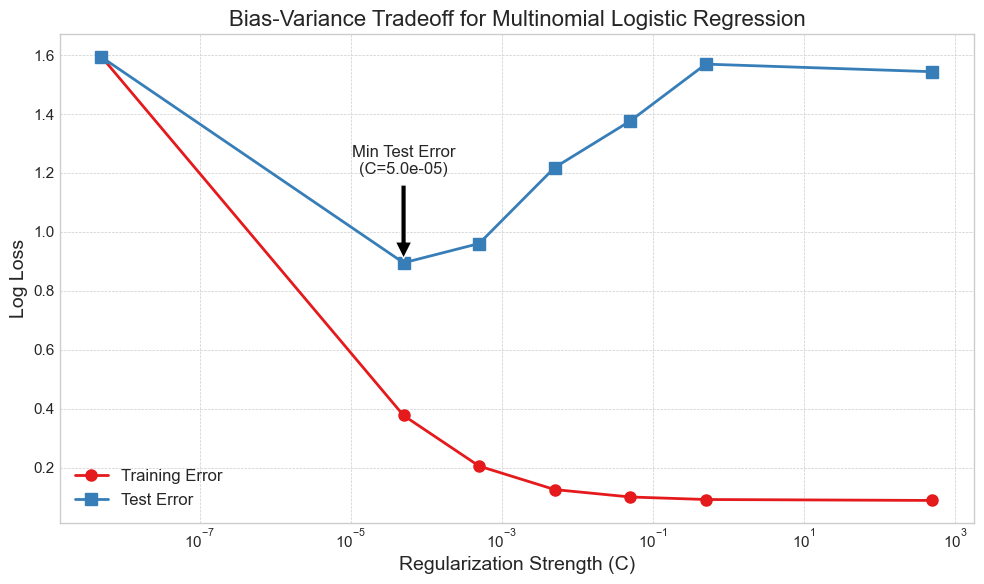

In [11]:
C_values = [0.000000005, 0.00005, 0.0005, 0.005, 0.05, 0.5, 500]

# Set style
plt.style.use("seaborn-v0_8-whitegrid")

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_errors, label='Training Error', marker='o', markersize=8, linewidth=2)
plt.plot(C_values, test_errors, label='Test Error', marker='s', markersize=8, linewidth=2)

# Set log scale for x-axis
plt.xscale('log')

# Titles and labels
plt.xlabel('Regularization Strength (C)', fontsize=14)
plt.ylabel('Log Loss', fontsize=14)
plt.title('Bias-Variance Tradeoff for Multinomial Logistic Regression', fontsize=16)

# Grid and legend
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)

# Annotate minimum test error point
min_test_error_idx = np.argmin(test_errors)
min_test_error = test_errors[min_test_error_idx]
min_C_value = C_values[min_test_error_idx]
plt.annotate(f'Min Test Error\n(C={min_C_value:.1e})',
             xy=(min_C_value, min_test_error),
             xytext=(min_C_value, min_test_error + 0.3),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12,
             ha='center')

# Show plot
plt.tight_layout()
plt.show()

In [12]:
# 2. Plot bias-variance tradeoff for each mode for GRADIENT BOOST model
g_boost_hyperparams = [
    {'n_estimators': 100, 'l_rate': 0.0001},
    {'n_estimators': 100, 'l_rate': 0.001},
    {'n_estimators': 100, 'l_rate': 0.01},
    {'n_estimators': 100, 'l_rate': 0.1},
    {'n_estimators': 100, 'l_rate': 1.0},
    {'n_estimators': 100, 'l_rate': 10.0},
    {'n_estimators': 100, 'l_rate': 100.0},
]

train_errors = []
test_errors = []

for idx, item in enumerate(g_boost_hyperparams):
    selector = ModelSelector(
        hyperparams={
            'g_boost': g_boost_hyperparams[idx]
        }
    )
    
    model = selector.select_model('g_boost')
    
    model.fit(X_train, y_train)
    
    # Predict probabilities
    y_train_prob = model.predict_proba(X_train)
    y_test_prob = model.predict_proba(X_test)
    
    # Calculate log loss (negative log likelihood)
    train_errors.append(log_loss(y_train, y_train_prob))
    test_errors.append(log_loss(y_test, y_test_prob))
    
    print('Train log loss: ', log_loss(y_train, y_train_prob, eps=1e-15))
    print('Test log loss: ', log_loss(y_test, y_test_prob, eps=1e-15))
    
    print(f'Training score:', model.score(X_train, y_train), 'for LR=', item['l_rate'])
    print('Test score:', model.score(X_test, y_test), 'for LR=', item['l_rate'])


Train log loss:  1.5719502678811463
Test log loss:  1.5712322098015974
Training score: 0.9994987468671679 for LR= 0.0001
Test score: 1.0 for LR= 0.0001
Train log loss:  1.2909047418036983
Test log loss:  1.2850334398263037
Training score: 0.9994987468671679 for LR= 0.001
Test score: 1.0 for LR= 0.001
Train log loss:  0.2615410096508044
Test log loss:  0.26715420446938853
Training score: 1.0 for LR= 0.01
Test score: 1.0 for LR= 0.01
Train log loss:  1.3207406103906125e-07
Test log loss:  0.004382147037642015
Training score: 1.0 for LR= 0.1
Test score: 1.0 for LR= 0.1
Train log loss:  5.252558857889974e-09
Test log loss:  0.00026335305370523804
Training score: 1.0 for LR= 1.0
Test score: 1.0 for LR= 1.0
Train log loss:  5.048481962169727e-09
Test log loss:  0.44783862935304025
Training score: 1.0 for LR= 10.0
Test score: 0.9871794871794872 for LR= 10.0
Train log loss:  1.0560728622002804
Test log loss:  0.6686504895211067
Training score: 0.9694235588972431 for LR= 100.0
Test score: 0.974

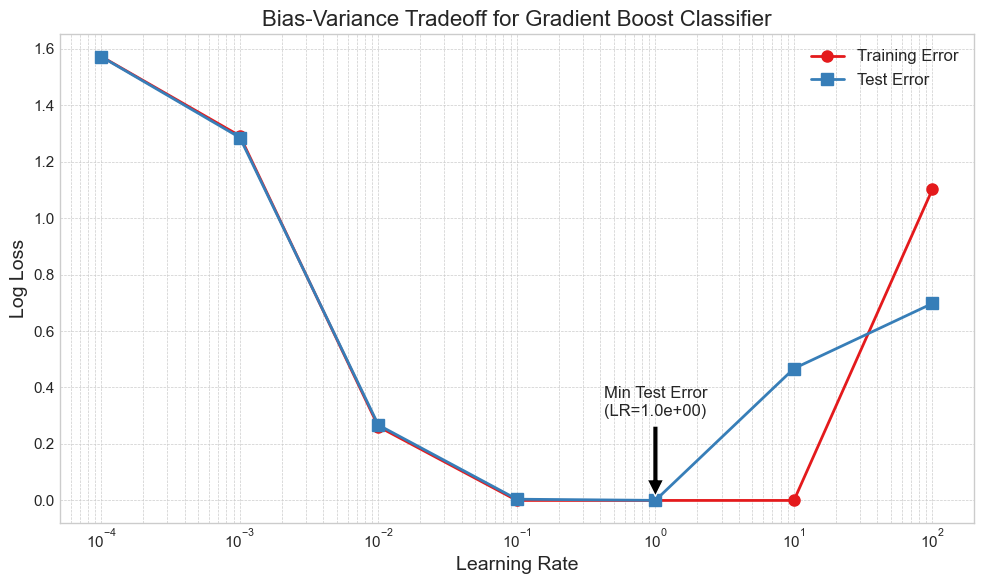

In [13]:
LR_values = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

# Set style
plt.style.use("seaborn-v0_8-whitegrid")

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(LR_values, train_errors, label='Training Error', marker='o', markersize=8, linewidth=2)
plt.plot(LR_values, test_errors, label='Test Error', marker='s', markersize=8, linewidth=2)

# Set log scale for x-axis
plt.xscale('log')

# Titles and labels
plt.xlabel('Learning Rate', fontsize=14)
plt.ylabel('Log Loss', fontsize=14)
plt.title('Bias-Variance Tradeoff for Gradient Boost Classifier', fontsize=16)

# Grid and legend
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)

# Annotate minimum test error point
min_test_error_idx = np.argmin(test_errors)
min_test_error = test_errors[min_test_error_idx]
min_LR_value = LR_values[min_test_error_idx]
plt.annotate(f'Min Test Error\n(LR={min_LR_value:.1e})',
             xy=(min_LR_value, min_test_error),
             xytext=(min_LR_value, min_test_error + 0.3),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12,
             ha='center')

# Show plot
plt.tight_layout()
plt.show()

In [14]:
# 3. Plot bias-variance tradeoff for each mode for RANDOM FOREST model
rand_forest_hyperparams = [
    {'n_estimators': 100, 'max_depth': 3},
    {'n_estimators': 100, 'max_depth': 5},
    {'n_estimators': 100, 'max_depth': 10},
    {'n_estimators': 100, 'max_depth': 20},
    {'n_estimators': 100, 'max_depth': 50},
    {'n_estimators': 100, 'max_depth': 75},
    {'n_estimators': 100, 'max_depth': 100},
]

train_errors = []
test_errors = []

for idx, item in enumerate(rand_forest_hyperparams):
    selector = ModelSelector(
        hyperparams={
            'rand_forest': rand_forest_hyperparams[idx]
        }
    )
    
    model = selector.select_model('rand_forest')
    
    model.fit(X_train, y_train)
    
    # Predict probabilities
    y_train_prob = model.predict_proba(X_train)
    y_test_prob = model.predict_proba(X_test)
    
    # Calculate log loss (negative log likelihood)
    train_errors.append(log_loss(y_train, y_train_prob))
    test_errors.append(log_loss(y_test, y_test_prob))
    
    print('Train log loss: ', log_loss(y_train, y_train_prob, eps=1e-15))
    print('Test log loss: ', log_loss(y_test, y_test_prob, eps=1e-15))
    
    print(f'Training score:', model.score(X_train, y_train), 'for Max Depth=', item['max_depth'])
    print('Test score:', model.score(X_test, y_test), 'for Max Depth=', item['max_depth'])

Train log loss:  0.3141074149770076
Test log loss:  0.3739322490209866
Training score: 0.9969924812030075 for Max Depth= 3
Test score: 0.9615384615384616 for Max Depth= 3
Train log loss:  0.08079598979818589
Test log loss:  0.15275666372642988
Training score: 1.0 for Max Depth= 5
Test score: 0.9743589743589743 for Max Depth= 5
Train log loss:  0.0047386700001019405
Test log loss:  0.09537193329270358
Training score: 1.0 for Max Depth= 10
Test score: 0.9807692307692307 for Max Depth= 10
Train log loss:  0.004419099360989887
Test log loss:  0.0952818393839253
Training score: 1.0 for Max Depth= 20
Test score: 0.9807692307692307 for Max Depth= 20
Train log loss:  0.004419099360989887
Test log loss:  0.0952818393839253
Training score: 1.0 for Max Depth= 50
Test score: 0.9807692307692307 for Max Depth= 50
Train log loss:  0.004419099360989887
Test log loss:  0.0952818393839253
Training score: 1.0 for Max Depth= 75
Test score: 0.9807692307692307 for Max Depth= 75
Train log loss:  0.0044190993

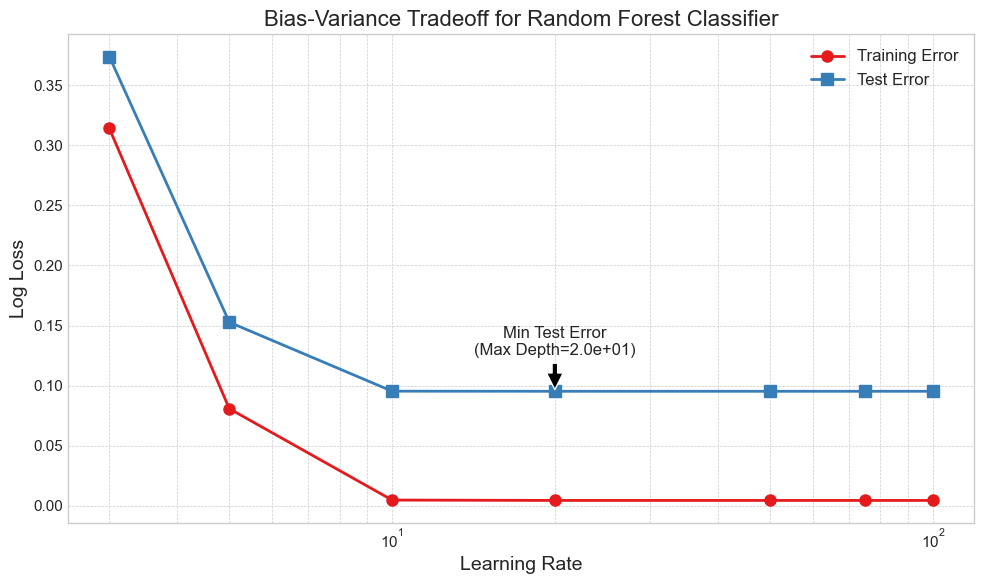

In [15]:
depth_values = [3, 5, 10, 20, 50, 75, 100]

# Set style
plt.style.use("seaborn-v0_8-whitegrid")

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(depth_values, train_errors, label='Training Error', marker='o', markersize=8, linewidth=2)
plt.plot(depth_values, test_errors, label='Test Error', marker='s', markersize=8, linewidth=2)

# Set log scale for x-axis
plt.xscale('log')

# Titles and labels
plt.xlabel('Learning Rate', fontsize=14)
plt.ylabel('Log Loss', fontsize=14)
plt.title('Bias-Variance Tradeoff for Random Forest Classifier', fontsize=16)

# Grid and legend
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)

# Annotate minimum test error point
min_test_error_idx = np.argmin(test_errors)
min_test_error = test_errors[min_test_error_idx]
best_depth_value = depth_values[min_test_error_idx]
plt.annotate(f'Min Test Error\n(Max Depth={best_depth_value:.1e})',
             xy=(best_depth_value, min_test_error),
             xytext=(best_depth_value, min_test_error + 0.03),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12,
             ha='center')

# Show plot
plt.tight_layout()
plt.show()

In [16]:
# Best 3 models
hyperparams_final = {
    'logistic': {'max_iter': 100, 'C': 0.00005, 'solver': 'lbfgs' },
    'g_boost': {'n_estimators': 100, 'l_rate': 1.0},
    'rand_forest': { 'n_estimators': 100, 'max_depth': 20}
}

model_selector_v2 = ModelSelector(hyperparams_final)

logistic_model = model_selector_v2.select_model('logistic')
g_boost_model = model_selector_v2.select_model('g_boost')
rand_forest_model = model_selector_v2.select_model('rand_forest')

logistic_model.fit(X_train, y_train)
g_boost_model.fit(X_train, y_train)
rand_forest_model.fit(X_train, y_train)

logistic_pred = logistic_model.predict(X_test)
g_boost_pred = g_boost_model.predict(X_test)
rand_forest_pred = rand_forest_model.predict(X_test)

# Calculate metrics for all 3 models

logistic_metrics = calculate_metrics(y_test, logistic_pred)
g_boost_metrics = calculate_metrics(y_test, g_boost_pred)
rand_forest_metrics = calculate_metrics(y_test, rand_forest_pred)

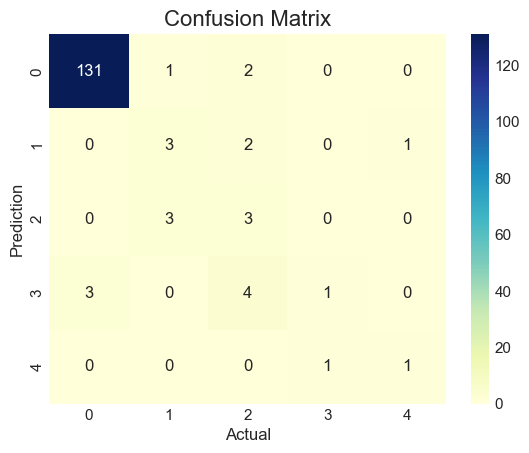

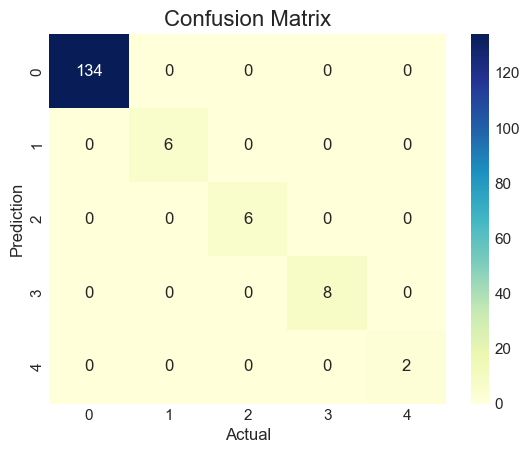

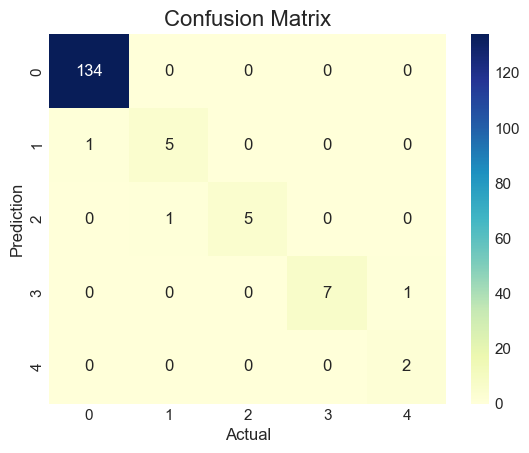

In [17]:
# Plot confusion matrixes

cm_labels = dict((v,k) for k,v in category_mapping.items())

conf_mat_logistic = logistic_metrics.get('confusion_matrix')

sns.heatmap(conf_mat_logistic, annot=True,fmt='d', cmap='YlGnBu', xticklabels=cm_labels, yticklabels=cm_labels)
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

conf_mat_g_boost = g_boost_metrics.get('confusion_matrix')

sns.heatmap(conf_mat_g_boost, annot=True,fmt='d', cmap='YlGnBu', xticklabels=cm_labels, yticklabels=cm_labels)
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

conf_mat_rand_forest = rand_forest_metrics.get('confusion_matrix')

sns.heatmap(conf_mat_rand_forest, annot=True,fmt='d', cmap='YlGnBu', xticklabels=cm_labels, yticklabels=cm_labels)
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In [18]:
# Show other metrics

metrics_data = {
    "Metric": ["Accuracy", "Balanced Accuracy", "Precision", "Recall", "F1 Score"],
    "Logistic Regression": [logistic_metrics['accuracy'], logistic_metrics['bal_accuracy'], logistic_metrics['precision'], logistic_metrics['recall'], logistic_metrics['f1_score']],
    "Gradient Boost": [g_boost_metrics['accuracy'], g_boost_metrics['bal_accuracy'], g_boost_metrics['precision'], g_boost_metrics['recall'], g_boost_metrics['f1_score']],
    "Random Forest": [rand_forest_metrics['accuracy'], rand_forest_metrics['bal_accuracy'], rand_forest_metrics['precision'], rand_forest_metrics['recall'], rand_forest_metrics['f1_score']]
}

# Create DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the DataFrame
print(tabulate(metrics_df, headers='keys', tablefmt='grid'))

+----+-------------------+----------------------------------------------------------+------------------+----------------------------------------------------------+
|    | Metric            | Logistic Regression                                      | Gradient Boost   | Random Forest                                            |
+====+===================+==========================================================+==================+==========================================================+
|  0 | Accuracy          | 0.8910256410256411                                       | 1.0              | 0.9807692307692307                                       |
+----+-------------------+----------------------------------------------------------+------------------+----------------------------------------------------------+
|  1 | Balanced Accuracy | 0.5205223880597015                                       | 1.0              | 0.9083333333333334                                       |
+----+----------